In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor


In [125]:
df = pd.read_csv('data/data_train.csv')
df.head()

,Input_current,Output_voltage,Input_voltage,Duty_Cycle,Power,Irradiance,Temperature
0,6.818701,58.373037,29.782506,0.485,212.117783,1000,25
1,7.313437,53.815293,23.990136,0.557,180.751131,1000,60
2,6.056522,49.442379,24.298210,0.505,152.417456,836,60
3,5.735578,50.894729,26.911060,0.475,161.503052,836,48
4,5.376322,48.436413,26.198545,0.457,146.294526,755,48


Separamos as 4 entradas: Irradiance, Temperature, Tensão de Entrada e Corrente de entrada
Separamos a saida: DutyCycle

In [126]:
df_x = df.loc[:,['Irradiance','Temperature','Input_current','Input_voltage']] #Seleciona por nome
df_y = df.loc[:,['Duty_Cycle']] #Seleciona por nome
print(df_x[:5])
print(df_y[:5])
print(df_x.shape)

   Irradiance  Temperature  Input_current  Input_voltage
0        1000           25       6.818701      29.782506
1        1000           60       7.313437      23.990136
2         836           60       6.056522      24.298210
3         836           48       5.735578      26.911060
4         755           48       5.376322      26.198545
   Duty_Cycle
0       0.485
1       0.557
2       0.505
3       0.475
4       0.457
(2093, 4)


In [127]:
x = df_x.values
y = df_y.values

print(x.shape,y.shape)

(2093, 4) (2093, 1)


<IPython.core.display.Javascript object>


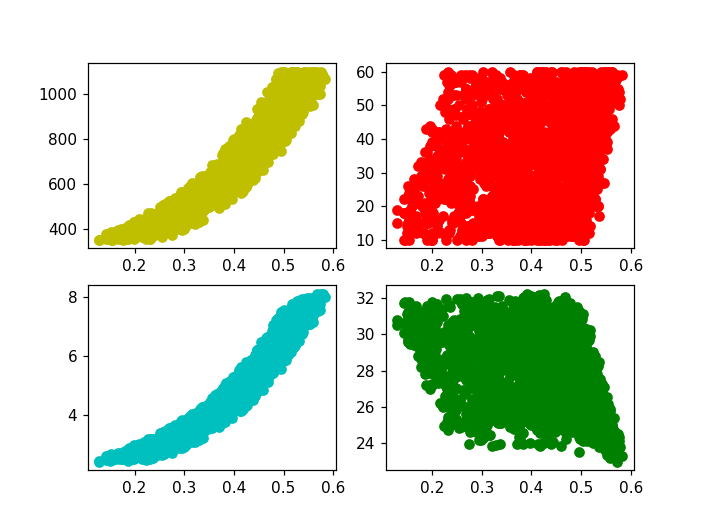

In [162]:
fig = plt.figure()
plt.subplot(2,2,1)
plt.plot(y,x[:,0],'yo')
plt.subplot(2,2,2)
plt.plot(y,x[:,1],'ro')
plt.subplot(2,2,3)
plt.plot(y,x[:,2],'co')
plt.subplot(2,2,4)
plt.plot(y,x[:,3],'go')
plt.show()


<IPython.core.display.Javascript object>


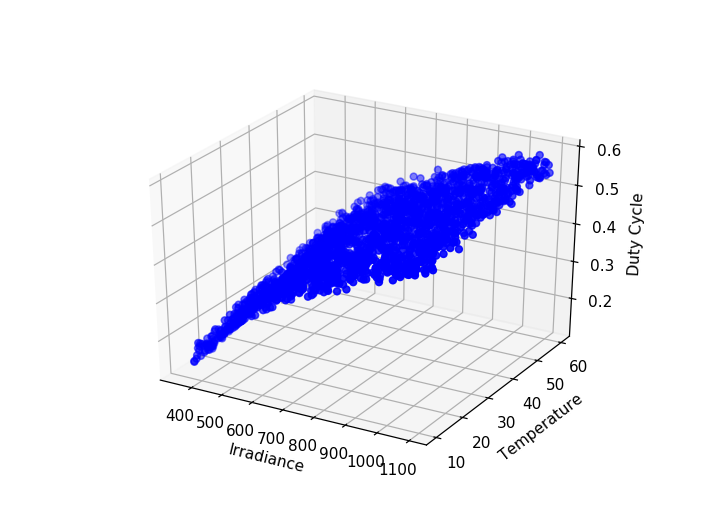

In [164]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x[:,0], x[:,1], y, c='b', marker='o')

ax.set_xlabel('Irradiance')
ax.set_ylabel('Temperature')
ax.set_zlabel('Duty Cycle')

plt.show()


<IPython.core.display.Javascript object>


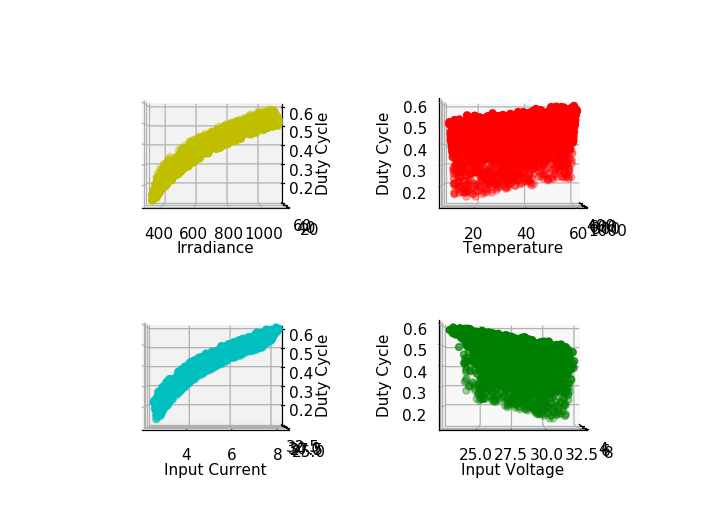

In [168]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.scatter(x[:,0], x[:,1], y, c='y', marker='o')
ax.view_init(0,-90)
ax.set_xlabel('Irradiance')

ax.set_zlabel('Duty Cycle')
plt.show()
ax = fig.add_subplot(222, projection='3d')
ax.scatter(x[:,0], x[:,1], y, c='r', marker='o')
ax.view_init(0,0)
ax.set_ylabel('Temperature')
ax.set_zlabel('Duty Cycle')


ax = fig.add_subplot(223, projection='3d')
ax.scatter(x[:,2], x[:,3], y, c='c', marker='o')
ax.view_init(0,-90)
ax.set_xlabel('Input Current')
ax.set_zlabel('Duty Cycle')

ax = fig.add_subplot(224, projection='3d')
ax.scatter(x[:,2], x[:,3], y, c='g', marker='o')
ax.view_init(0,0)
ax.set_ylabel('Input Voltage')
ax.set_zlabel('Duty Cycle')

plt.show()

In [402]:
from sklearn.model_selection import train_test_split                                            
from sklearn.preprocessing import StandardScaler                                                
from sklearn.neural_network import MLPRegressor                                                 

# Divide nosso conjunto de dados em Treino e Teste 0.7/0.3
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30) 

# Padroniza as features retirando a media e normalizando pelo desvio. Para conjunto de treino e teste
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Treinamos o modelo usando X_train e e verificamos o score com o conjunto de teste
# Ajustamos as parametros do Regressor para que tivessemos um bom resultado.
modelo = MLPRegressor(activation='relu', solver='lbfgs', hidden_layer_sizes=(4,4,4))                 
modelo.fit(X_train, y_train)                                                                  
modelo.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9935970118821251

In [ ]:
Exporta para quatro entrada

In [175]:
coefs=np.asarray(modelo.coefs_[0])
np.savetxt("pesos_0.csv", coefs, delimiter=",")
coefs=np.asarray(modelo.coefs_[1])
np.savetxt("pesos_1.csv", coefs, delimiter=",")
coefs=np.asarray(modelo.coefs_[2])
np.savetxt("pesos_2.csv", coefs, delimiter=",")
coefs=np.asarray(modelo.coefs_[3])
np.savetxt("pesos_3.csv", coefs, delimiter=",")



bias=np.asarray(modelo.intercepts_[0])
np.savetxt("bias_0.csv", bias, delimiter=",")
bias=np.asarray(modelo.intercepts_[1])
np.savetxt("bias_1.csv", bias, delimiter=",")
bias=np.asarray(modelo.intercepts_[2])
np.savetxt("bias_2.csv", bias, delimiter=",")
bias=np.asarray(modelo.intercepts_[3])
np.savetxt("bias_3.csv", bias, delimiter=",")

print(modelo.coefs_)
print(modelo.intercepts_)
df = pd.DataFrame({'col':modelo.coefs_})
df.to_csv('file_name.csv')
[12:14, 29/6/2018] Tulio Gomes: coef_0=np.asarray(modelo.coefs_[0])
np.savetxt("foo.csv", coef_0.reshape(:,16), delimiter=",")

In [169]:
Mesma coisa agora so para duas entradas

SyntaxError: invalid syntax (<ipython-input-169-7d2ccece4f91>, line 1)

In [186]:
df_x = df.loc[:,['Irradiance','Temperature']] #Seleciona por nome
df_y = df.loc[:,['Duty_Cycle']] #Seleciona por nome
print(df_x[:5])
print(df_y[:5])
print(df_x.shape)
x = df_x.values
y = df_y.values

print(x.shape,y.shape)

   Irradiance  Temperature
0        1000           25
1        1000           60
2         836           60
3         836           48
4         755           48
   Duty_Cycle
0       0.485
1       0.557
2       0.505
3       0.475
4       0.457
(2093, 2)
(2093, 2) (2093, 1)


In [191]:
from sklearn.model_selection import train_test_split                                            
from sklearn.preprocessing import StandardScaler                                                
from sklearn.neural_network import MLPRegressor                                                 

# Divide nosso conjunto de dados em Treino e Teste 0.7/0.3
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.15) 

# Padroniza as features retirando a media e normalizando pelo desvio. Para conjunto de treino e teste
#scaler = StandardScaler() 
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

# Treinamos o modelo usando X_train e e verificamos o score com o conjunto de teste
# Ajustamos as parametros do Regressor para que tivessemos um bom resultado.
modelo = MLPRegressor(activation='tanh', solver='lbfgs',alpha=0.00000001, hidden_layer_sizes=(150,150,150))                 
modelo.fit(X_train, y_train)                                                                  
modelo.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9845198899922502

In [172]:
modelo.max_iter

200

In [192]:
coefs=np.asarray(modelo.coefs_[0])
np.savetxt("pesos_0.csv", coefs, delimiter=",")
coefs=np.asarray(modelo.coefs_[1])
np.savetxt("pesos_1.csv", coefs, delimiter=",")
coefs=np.asarray(modelo.coefs_[2])
np.savetxt("pesos_2.csv", coefs, delimiter=",")
coefs=np.asarray(modelo.coefs_[3])
np.savetxt("pesos_3.csv", coefs, delimiter=",")



bias=np.asarray(modelo.intercepts_[0])
np.savetxt("bias_0.csv", bias, delimiter=",")
bias=np.asarray(modelo.intercepts_[1])
np.savetxt("bias_1.csv", bias, delimiter=",")
bias=np.asarray(modelo.intercepts_[2])
np.savetxt("bias_2.csv", bias, delimiter=",")
bias=np.asarray(modelo.intercepts_[3])
np.savetxt("bias_3.csv", bias, delimiter=",")

In [185]:
modelo.coefs_

[array([[-1.03348251e-01, -7.09770243e-02,  3.02098985e-02,
         -5.32769628e-03,  1.42299556e-01,  7.39859476e-02,
          5.82498077e-02, -1.47900930e-01,  3.26655849e-02,
          4.92269457e-02, -3.23131247e-01,  7.24827565e-02,
          1.27745401e-01,  8.36920814e-02, -2.47714199e-02,
         -1.10979419e-01, -1.80370430e-01,  5.84069861e-02,
         -1.42332518e-01, -1.85169220e-01, -1.86320401e-01,
         -1.45792242e-03,  1.26700811e-01, -5.45374568e-02,
         -5.87569326e-02,  1.27639888e-01, -1.11440032e-01,
          1.55580334e-01,  2.46052511e-01, -9.61680568e-02,
         -2.29878448e-02, -5.07921570e-02, -7.43536202e-02,
         -7.23340581e-02, -1.38715376e-01,  1.89157054e-01,
          1.22712753e-01, -9.65287512e-03,  1.72975881e-01,
          1.71489539e-01, -4.48606638e-02,  5.95624071e-02,
          2.20564585e-03,  1.29284415e-01, -2.25321184e-02,
         -1.35428621e-01,  1.14413729e-01, -5.46357685e-02,
          2.96291357e-02, -3.75321273e-0